## Find the Flag

#### Author: Yesahel Scicluna 

#### Source: Codecademy. Build a Machine Learning Model. Practice Project - Find the Flag

#### Concepts: Decision Trees

#### Required Data Files: flags.csv

#### Task Description
Can you guess which continent this [flag](https://content.codecademy.com/programs/data-science-path/decision-trees/reunion.png) comes from? 

What are some of the features that would clue you in? Maybe some of the colors are good indicators. The presence or absence of certain shapes could give you a hint. 

In this project, we’ll use decision trees to try to predict the continent of flags based on several of these features. The dataset we'll be using is from [UCI’s Machine Learning Repository](https://archive.ics.uci.edu/dataset/40/flags).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#### Task 1
Let’s start by seeing what the data looks like. Begin by loading the data in `"flags.csv"` into a variable named `flags`.

In [2]:
flags = pd.read_csv(r"https://raw.githubusercontent.com/yezisti/Yesahel_Scicluna--M.Sc._Bioinformatics--Portfolio/main/Python/Codecademy/Build%20a%20Machine%20Learning%20Model/find_the_flag/flags.csv")

#### Task 2
Take a look at the names of the columns in our DataFrame. These are the features we have available to us. Print `flags.columns`. 

Let’s also take a look at the first few rows of the dataset. Print `flags.head()`.

In [3]:
flags.columns

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')

In [4]:
flags.head(10)

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,2,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,2,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue


#### Task 3
We’re eventually going to use create a decision tree to classify what `Landmass` a country is on.

Create a variable named `labels` and set it equal to only the `"Landmass"` column from `flags`.

In [5]:
labels = flags.Landmass
labels

0      5
1      3
2      4
3      6
4      3
      ..
189    6
190    3
191    4
192    4
193    4
Name: Landmass, Length: 194, dtype: int64

#### Task 4
We have our labels. Now we want to choose which columns will help our decision tree correctly classify those labels.

You could spend a lot of time playing with groups of columns to find the that work best. But for now, let’s see if we can predict where a country is based only on the colors of its flag.

Create a variable named `data` and set it equal to a DataFrame containing the following columns from `flags`:

- `"Red"`
- `"Green"`
- `"Blue"`
- `"Gold"`
- `"White"`
- `"Black"`
- `"Orange"`

In [6]:
data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange"]]
data

,Red,Green,Blue,Gold,White,Black,Orange
0,1,1,0,1,1,1,0
1,1,0,0,1,0,1,0
2,1,1,0,0,1,0,0
3,1,0,1,1,1,0,1
4,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...
189,1,0,1,0,1,0,0
190,1,0,1,1,1,0,0
191,1,1,0,1,0,0,1
192,1,1,0,0,0,1,1


#### Task 5
Finally, let’s split these DataFrames into a training set and test set using the `train_test_split()` function. Include the parameter `random_state = 1`.

This function returns four values. Name the values the function returns as `train_data`, `test_data`, `train_labels`, and `test_labels`.

In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 1)

#### Task 6
Create a `DecisionTreeClassifier` and name it `tree`. When you create the tree, give it the parameter `random_state = 1`.

In [8]:
tree = DecisionTreeClassifier(random_state = 1)

#### Task 7
Call `tree`'s `.fit()` method to fit the tree to the training data.

In [9]:
tree.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=1)

#### Task 8
Call `.score()` using `test_data` and `test_labels`. Print the result.

Since there are six possible landmasses, if we randomly guessed, we’d expect to be right about 16% of the time. Did our decision tree beat randomly guessing?

In [10]:
tree.score(test_data, test_labels)

0.3469387755102041

#### Task 9
We now have a good baseline of how our model performs with these features. Let’s see if we can prune the tree to make it better!

Put your code that creates, trains, and tests the tree inside a for loop that has a variable named `i` that increases from `1` to `20`.

Inside your for loop, when you create `tree`, give it the parameter `max_depth = i`.

We’ll now see a printout of how the accuracy changes depending on how large we allow the tree to be.

In [11]:
# Prints headers for the list
print('max_depth:', ' ', 'accuracy:')

for i in range(1, 21):
  tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
  tree.fit(train_data, train_labels)

  # Prints the list with padding
  print(str(i).rjust(2, '0'), ' ' * 9, str(tree.score(test_data, test_labels)).ljust(19, '0'))

max_depth:   accuracy:
01           0.34693877551020410
02           0.22448979591836735
03           0.34693877551020410
04           0.32653061224489793
05           0.34693877551020410
06           0.34693877551020410
07           0.34693877551020410
08           0.34693877551020410
09           0.34693877551020410
10           0.34693877551020410
11           0.34693877551020410
12           0.34693877551020410
13           0.34693877551020410
14           0.34693877551020410
15           0.34693877551020410
16           0.34693877551020410
17           0.34693877551020410
18           0.34693877551020410
19           0.34693877551020410
20           0.34693877551020410


#### Task 10
Rather than printing the score of each tree, let’s graph it! We want the x-axis to show the depth of the tree and the y-axis to show the tree’s score.

To do this, we’ll need to create a list containing all of the scores. Before the for loop, create an empty list named `scores`. Inside the loop, instead of printing the tree’s score, use `.append()` to add it to `scores`.

In [12]:
scores = []
for i in range(1, 21):
  tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
  tree.fit(train_data, train_labels)
  scores.append(tree.score(test_data, test_labels))

#### Task 11
Let’s now plot our points. Call `plt.plot()` on your data and then call `plt.show()`.

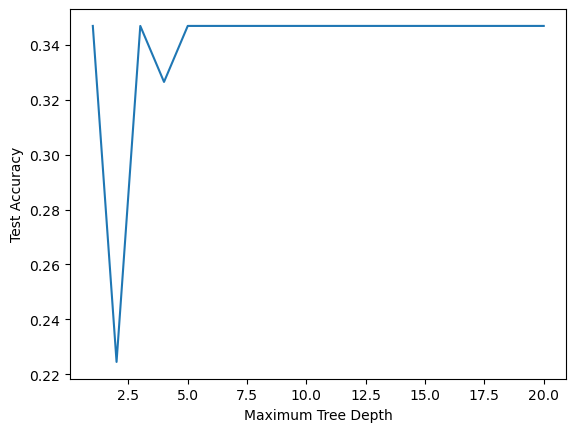

In [13]:
plt.plot(range(1, 21), scores)
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Test Accuracy')
plt.show()
plt.close()

#### Task 12
Our graph doesn’t really look like we would expect it to. It seems like the depth of the tree isn’t really having an impact on its performance. This might be a good indication that we’re not using enough features.

Let’s add all the features that have to do with shapes to our data. `data` should now be set equal to:

`flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange", "Circles", "Crosses","Saltires","Quarters","Sunstars", "Crescent","Triangle"]]`

What does your graph look like after making this change?

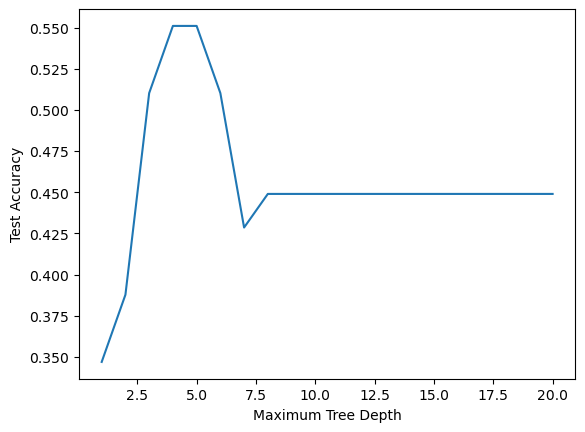

In [14]:
data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange", "Circles", "Crosses", "Saltires", "Quarters", "Sunstars", "Crescent","Triangle"]]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 1)

scores = []
for i in range(1, 21):
  tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
  tree.fit(train_data, train_labels)
  scores.append(tree.score(test_data, test_labels))

plt.plot(range(1, 21), scores)
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Test Accuracy')
plt.show()
plt.close()

In [15]:
# Accuracy first increases as increasing tree depth mitigates for underfitting,
# accuracy reaches its maximum at about 0.55, 
# and then accuracy decreases until it reaches a plateau as further increase in tree depth causes overfitting.